Predictive model of service upgrade to 4G transition
Description:
Data records customer usage characteristics for 10 consecutive months in a Telecom Company. These include the following main fields:
- cuoc_goc_gprs_220601: Customer data revenue generated when using exceeding the allowed traffic
- ha_tang_220601: The infrastructure used by KH 2G-3G is an old technology, 4G is a new technology in the future 
- is_sim_4g_220601: Customers who already have a 4G SIM SIM (Necessary condition for TB to be able to move to 4G infrastructure)
- ll_thoai_220601: Voice traffic customers usage 
- nod_psll_thoai_220601: Number of days using voice calls
- so_lan_nap_the_220601: Number of times to top up the card (top up the account for consumption)
- so_lan_nap_topup_220601: TOP up is a modern form of top-up via banks or digital tools, customers with no value ie top up in the traditional way.
- so_ngay_su_dung_220601: Number of days using one of their services: Voice, Data, SMS.
- thiet_bi_220601: Device customers are using: 2G devices, 3G devices, 4G devices (Only customers with 4G devices can convert customers to 4G)
- thuc_4g_220601: This field is the field that needs to be used to check whether the customer is actually 4G or not ==> I need to forecast that the group of customers with a value of 0 has the potential to convert to 1 in the next month.
- tong_cuoc_goc_data_4_huong_22060: Spending of customers for Data services (VND)
- tong_cuoc_goc_fn_220601: Customer's spending for all services provided on customer's phone number (Voice, SMS, Data, Vas) (VND)
- tong_cuoc_goc_thoai_220601: Spending of customers on voice services (VND)
- tong_ll_gprs_220601: Customer's data usage behavior (Unit GB) - like the type of customer's unit of measure when watching youtube/going to facebook.
- tong_tien_nap_the_220601: Amount of money deposited into the account by the customer to spend
- tong_tien_nap_topup_220601: Amount deposited into account by modern methods (Bank, digital payment)
- tuoi_khach_hang_cut_level_220601: Age cycle (months)
- user_id: subscriber ID (This is the encoding of the phone number)


Dataset source: https://drive.google.com/file/d/1gK1H6UvKk9D07a0OJBiVj8Ld4ZR1CHL5/view

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy as np 
import warnings 
import time
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/yukitran/Desktop/Dataset/Data Test Viettel/data.CSV")

In [3]:
df.head(5)

,CUOC_GOC_GPRS_210901,CUOC_GOC_GPRS_211001,CUOC_GOC_GPRS_211101,CUOC_GOC_GPRS_211201,CUOC_GOC_GPRS_220101,CUOC_GOC_GPRS_220201,CUOC_GOC_GPRS_220301,CUOC_GOC_GPRS_220401,CUOC_GOC_GPRS_220501,CUOC_GOC_GPRS_220601,...,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TONG_TIEN_NAP_TOPUP_220601,TUOI_KHACH_HANG_cut_level_220601,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 < X <= 65,7.029190e+11
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45 < X <= 55,3.515970e+11
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 < X <= 15,7.235010e+11
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,200000.0,0.0,260000.0,0.0,150000.0,10000.0,0 < X <= 15,4.203840e+11
4,0.0,0.0,570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,0.0,100000.0,0.0,0.0,0.0,100000.0,25 < X <= 35,8.207820e+11


In [4]:
# iterating the columns
for col in df.columns:
    print(col)

CUOC_GOC_GPRS_210901
CUOC_GOC_GPRS_211001
CUOC_GOC_GPRS_211101
CUOC_GOC_GPRS_211201
CUOC_GOC_GPRS_220101
CUOC_GOC_GPRS_220201
CUOC_GOC_GPRS_220301
CUOC_GOC_GPRS_220401
CUOC_GOC_GPRS_220501
CUOC_GOC_GPRS_220601
HA_TANG_210901
HA_TANG_211001
HA_TANG_211101
HA_TANG_211201
HA_TANG_220101
HA_TANG_220201
HA_TANG_220301
HA_TANG_220401
HA_TANG_220501
HA_TANG_220601
IS_DCOM_210901
IS_DCOM_211001
IS_DCOM_211101
IS_DCOM_211201
IS_DCOM_220101
IS_DCOM_220201
IS_DCOM_220301
IS_DCOM_220401
IS_DCOM_220501
IS_DCOM_220601
IS_SIM_4G_210901
IS_SIM_4G_211001
IS_SIM_4G_211101
IS_SIM_4G_211201
IS_SIM_4G_220101
IS_SIM_4G_220201
IS_SIM_4G_220301
IS_SIM_4G_220401
IS_SIM_4G_220501
IS_SIM_4G_220601
LL_THOAI_210901
LL_THOAI_211001
LL_THOAI_211101
LL_THOAI_211201
LL_THOAI_220101
LL_THOAI_220201
LL_THOAI_220301
LL_THOAI_220401
LL_THOAI_220501
LL_THOAI_220601
NOD_PSLL_DATA_210901
NOD_PSLL_DATA_211001
NOD_PSLL_DATA_211101
NOD_PSLL_DATA_211201
NOD_PSLL_DATA_220101
NOD_PSLL_DATA_220201
NOD_PSLL_DATA_220301
NOD_PSLL_DATA

In [5]:
#Create a copy data based on the original dataset to ensure data integrity
data_copy=df.copy()
data_copy

,CUOC_GOC_GPRS_210901,CUOC_GOC_GPRS_211001,CUOC_GOC_GPRS_211101,CUOC_GOC_GPRS_211201,CUOC_GOC_GPRS_220101,CUOC_GOC_GPRS_220201,CUOC_GOC_GPRS_220301,CUOC_GOC_GPRS_220401,CUOC_GOC_GPRS_220501,CUOC_GOC_GPRS_220601,...,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TONG_TIEN_NAP_TOPUP_220601,TUOI_KHACH_HANG_cut_level_220601,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 < X <= 65,7.029190e+11
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45 < X <= 55,3.515970e+11
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 < X <= 15,7.235010e+11
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,200000.0,0.0,260000.0,0.0,150000.0,10000.0,0 < X <= 15,4.203840e+11
4,0.0,0.0,570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,0.0,100000.0,0.0,0.0,0.0,100000.0,25 < X <= 35,8.207820e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75 < X,6.012020e+11
199996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45 < X <= 55,9.647200e+11
199997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65 < X <= 75,3.953201e+08
199998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45 < X <= 55,2.826860e+11


In [6]:
#Drop duplicate value (if any)
# data_copy=data_copy.drop_duplicates(keep=False)
# data_copy

In [7]:
#Count the na values in dataset then decide to keep or delete
data_copy.isna().sum().sort_values(ascending=False)

# As a rule of thumbs, if the missing values is under 5% of total value, we can
#delete the na value ~ 5%*200.000 ~ 10.000 and the highest sum of na values is 175 -> delete
data_copy=data_copy.dropna(axis =0)

In [8]:
#From the above result, 
data_copy.drop_duplicates(subset ='user_id',inplace=True)
data_copy

,CUOC_GOC_GPRS_210901,CUOC_GOC_GPRS_211001,CUOC_GOC_GPRS_211101,CUOC_GOC_GPRS_211201,CUOC_GOC_GPRS_220101,CUOC_GOC_GPRS_220201,CUOC_GOC_GPRS_220301,CUOC_GOC_GPRS_220401,CUOC_GOC_GPRS_220501,CUOC_GOC_GPRS_220601,...,TONG_TIEN_NAP_TOPUP_211101,TONG_TIEN_NAP_TOPUP_211201,TONG_TIEN_NAP_TOPUP_220101,TONG_TIEN_NAP_TOPUP_220201,TONG_TIEN_NAP_TOPUP_220301,TONG_TIEN_NAP_TOPUP_220401,TONG_TIEN_NAP_TOPUP_220501,TONG_TIEN_NAP_TOPUP_220601,TUOI_KHACH_HANG_cut_level_220601,user_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55 < X <= 65,7.029190e+11
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45 < X <= 55,3.515970e+11
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0 < X <= 15,7.235010e+11
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,200000.0,0.0,260000.0,0.0,150000.0,10000.0,0 < X <= 15,4.203840e+11
4,0.0,0.0,570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100000.0,0.0,0.0,100000.0,0.0,0.0,0.0,100000.0,25 < X <= 35,8.207820e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35 < X <= 45,7.618140e+11
199996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45 < X <= 55,9.647200e+11
199997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65 < X <= 75,3.953201e+08
199998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45 < X <= 55,2.826860e+11


In [9]:
data_copy.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182967 entries, 0 to 199999
Data columns (total 182 columns):
 #    Column                             Non-Null Count   Dtype  
---   ------                             --------------   -----  
 0    CUOC_GOC_GPRS_210901               182967 non-null  float64
 1    CUOC_GOC_GPRS_211001               182967 non-null  float64
 2    CUOC_GOC_GPRS_211101               182967 non-null  float64
 3    CUOC_GOC_GPRS_211201               182967 non-null  float64
 4    CUOC_GOC_GPRS_220101               182967 non-null  float64
 5    CUOC_GOC_GPRS_220201               182967 non-null  float64
 6    CUOC_GOC_GPRS_220301               182967 non-null  float64
 7    CUOC_GOC_GPRS_220401               182967 non-null  float64
 8    CUOC_GOC_GPRS_220501               182967 non-null  float64
 9    CUOC_GOC_GPRS_220601               182967 non-null  float64
 10   HA_TANG_210901                     182967 non-null  object 
 11   HA_TANG_211001          

In [10]:
#Transpose data from wide_format to long_format
long_data=pd.wide_to_long(data_copy, 
                          ["CUOC_GOC_GPRS_","HA_TANG_","IS_DCOM_","IS_SIM_4G_","LL_THOAI_","NOD_PSLL_DATA_","NOD_PSLL_THOAI_",
                           "SO_LAN_NAP_THE_","SO_LAN_NAP_TOPUP_","SO_NGAY_SU_DUNG_","THIET_BI_","thuc_4g_",
                           "TONG_CUOC_GOC_DATA_4_HUONG_","TONG_CUOC_GOC_FN_","TONG_CUOC_GOC_THOAI_",
                           "TONG_LL_GPRS_","TONG_TIEN_NAP_THE_","TONG_TIEN_NAP_TOPUP_"]
                , i="user_id", j="time").reset_index()
long_data

,user_id,time,TUOI_KHACH_HANG_cut_level_220601,CUOC_GOC_GPRS_,HA_TANG_,IS_DCOM_,IS_SIM_4G_,LL_THOAI_,NOD_PSLL_DATA_,NOD_PSLL_THOAI_,...,SO_LAN_NAP_TOPUP_,SO_NGAY_SU_DUNG_,THIET_BI_,thuc_4g_,TONG_CUOC_GOC_DATA_4_HUONG_,TONG_CUOC_GOC_FN_,TONG_CUOC_GOC_THOAI_,TONG_LL_GPRS_,TONG_TIEN_NAP_THE_,TONG_TIEN_NAP_TOPUP_
0,7.029190e+11,210901,55 < X <= 65,0.0,-1G,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
1,3.515970e+11,210901,45 < X <= 55,0.0,-1G,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
2,7.235010e+11,210901,0 < X <= 15,0.0,2G,1.0,0.0,0.0,6.0,0.0,...,0.0,6.0,2G,0.0,0.0,0.0,0.0,1.503600e+04,0.0,0.0
3,4.203840e+11,210901,0 < X <= 15,0.0,4G,0.0,1.0,1254.0,22.0,5.0,...,0.0,30.0,4G,1.0,148000.0,256159.5,36047.5,2.599680e+10,300000.0,0.0
4,8.207820e+11,210901,25 < X <= 35,0.0,2G,4.0,0.0,0.0,29.0,0.0,...,0.0,29.0,Unknown,0.0,25000.0,25000.0,0.0,2.522611e+06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1829665,7.618140e+11,220601,35 < X <= 45,0.0,G,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
1829666,9.647200e+11,220601,45 < X <= 55,0.0,G,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
1829667,3.953201e+08,220601,65 < X <= 75,0.0,G,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0
1829668,2.826860e+11,220601,45 < X <= 55,0.0,G,-1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,Unknown,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0


In [11]:
# Creating dim table including user_id and customer's age bins
# dim_age= data_copy[["user_id","TUOI_KHACH_HANG_cut_level_220601"]]
# dim_age.head(5)

In [12]:
#Checking dataset order by user_id, time 
long_data.sort_values(['user_id', 'time']).head(30)

,user_id,time,TUOI_KHACH_HANG_cut_level_220601,CUOC_GOC_GPRS_,HA_TANG_,IS_DCOM_,IS_SIM_4G_,LL_THOAI_,NOD_PSLL_DATA_,NOD_PSLL_THOAI_,...,SO_LAN_NAP_TOPUP_,SO_NGAY_SU_DUNG_,THIET_BI_,thuc_4g_,TONG_CUOC_GOC_DATA_4_HUONG_,TONG_CUOC_GOC_FN_,TONG_CUOC_GOC_THOAI_,TONG_LL_GPRS_,TONG_TIEN_NAP_THE_,TONG_TIEN_NAP_TOPUP_
87745,12540981.0,210901,25 < X <= 35,0.0,4G,0.0,1.0,913.0,2.0,8.0,...,0.0,23.0,2G,0.0,30000.0,91483.69,34733.69,1.470043e+09,90000.0,0.0
270712,12540981.0,211001,25 < X <= 35,0.0,4G,0.0,1.0,380.0,11.0,9.0,...,0.0,31.0,4G,1.0,20000.0,32573.66,11673.66,8.444833e+09,0.0,0.0
453679,12540981.0,211101,25 < X <= 35,0.0,4G,0.0,1.0,2281.0,9.0,16.0,...,1.0,30.0,4G,1.0,15000.0,100099.91,71799.91,1.565508e+09,100000.0,50000.0
636646,12540981.0,211201,25 < X <= 35,0.0,4G,0.0,1.0,1681.0,20.0,14.0,...,0.0,31.0,4G,1.0,30000.0,99351.40,55051.40,2.962712e+09,20000.0,0.0
819613,12540981.0,220101,25 < X <= 35,0.0,4G,0.0,1.0,3385.0,16.0,23.0,...,1.0,31.0,4G,1.0,30000.0,140526.90,104876.90,3.642241e+09,150000.0,100000.0
1002580,12540981.0,220201,25 < X <= 35,0.0,3G,0.0,1.0,3038.0,28.0,22.0,...,3.0,28.0,3G,0.0,120000.0,215507.76,89857.76,2.253656e+10,200000.0,200000.0
1185547,12540981.0,220301,25 < X <= 35,0.0,3G,0.0,1.0,980.0,14.0,10.0,...,0.0,26.0,3G,0.0,30000.0,83775.01,40825.01,2.444061e+09,90000.0,0.0
1368514,12540981.0,220401,25 < X <= 35,0.0,3G,0.0,1.0,1394.0,25.0,8.0,...,0.0,28.0,3G,0.0,0.0,56746.84,47296.84,4.996602e+09,50000.0,0.0
1551481,12540981.0,220501,25 < X <= 35,0.0,3G,0.0,1.0,2643.0,3.0,19.0,...,0.0,27.0,2G,0.0,0.0,70867.82,62167.82,1.087638e+07,50000.0,0.0
1734448,12540981.0,220601,25 < X <= 35,0.0,2G,0.0,1.0,1274.0,0.0,13.0,...,0.0,21.0,2G,0.0,0.0,50024.55,42324.55,0.000000e+00,50000.0,0.0


In [13]:
long_data.describe()

,user_id,time,CUOC_GOC_GPRS_,IS_DCOM_,IS_SIM_4G_,LL_THOAI_,NOD_PSLL_DATA_,NOD_PSLL_THOAI_,SO_LAN_NAP_THE_,SO_LAN_NAP_TOPUP_,SO_NGAY_SU_DUNG_,thuc_4g_,TONG_CUOC_GOC_DATA_4_HUONG_,TONG_CUOC_GOC_FN_,TONG_CUOC_GOC_THOAI_,TONG_LL_GPRS_,TONG_TIEN_NAP_THE_,TONG_TIEN_NAP_TOPUP_
count,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06,1.829670e+06
mean,4.954835e+11,2.166310e+05,7.028549e+01,1.582034e-02,9.317708e-01,2.739810e+03,1.037224e+01,1.126145e+01,1.180276e+00,4.893566e-01,2.282820e+01,4.823558e-01,2.596313e+04,6.075648e+04,1.988099e+04,5.161211e+09,5.966671e+04,2.818632e+04
std,2.904170e+11,4.558521e+03,3.136311e+03,1.980521e-01,2.521389e-01,8.391453e+03,1.271176e+01,1.002911e+01,2.143592e+00,1.264241e+00,1.074701e+01,4.996887e-01,5.229499e+04,1.092346e+05,4.159296e+04,1.488015e+10,1.240972e+05,7.822173e+04
min,1.254098e+07,2.109010e+05,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.426620e+11,2.111010e+05,0.000000e+00,0.000000e+00,1.000000e+00,3.600000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,0.000000e+00,0.000000e+00,3.454500e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.946460e+11,2.201510e+05,0.000000e+00,0.000000e+00,1.000000e+00,6.230000e+02,2.000000e+00,9.000000e+00,1.000000e+00,0.000000e+00,3.000000e+01,0.000000e+00,0.000000e+00,2.913850e+04,5.339630e+03,4.096200e+04,2.000000e+04,0.000000e+00
75%,7.473860e+11,2.204010e+05,0.000000e+00,0.000000e+00,1.000000e+00,2.216000e+03,2.600000e+01,2.000000e+01,2.000000e+00,1.000000e+00,3.100000e+01,1.000000e+00,3.000000e+04,9.000000e+04,2.323449e+04,1.474678e+09,1.000000e+05,2.000000e+04
max,9.999880e+11,2.206010e+05,2.131197e+06,5.000000e+00,1.000000e+00,6.773730e+05,3.100000e+01,3.100000e+01,4.000000e+02,4.000000e+02,3.100000e+01,1.000000e+00,6.300000e+06,2.894900e+07,6.425197e+06,8.637980e+11,2.880000e+07,1.184000e+07


In [14]:
long_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829670 entries, 0 to 1829669
Data columns (total 21 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   user_id                           float64
 1   time                              int64  
 2   TUOI_KHACH_HANG_cut_level_220601  object 
 3   CUOC_GOC_GPRS_                    float64
 4   HA_TANG_                          object 
 5   IS_DCOM_                          float64
 6   IS_SIM_4G_                        float64
 7   LL_THOAI_                         float64
 8   NOD_PSLL_DATA_                    float64
 9   NOD_PSLL_THOAI_                   float64
 10  SO_LAN_NAP_THE_                   float64
 11  SO_LAN_NAP_TOPUP_                 float64
 12  SO_NGAY_SU_DUNG_                  float64
 13  THIET_BI_                         object 
 14  thuc_4g_                          float64
 15  TONG_CUOC_GOC_DATA_4_HUONG_       float64
 16  TONG_CUOC_GOC_FN_                 fl

In [15]:
#long_data.to_csv("long_data.csv")

In [16]:
# Some attributes we can add into model (high correlation with thuc 4G):
# Số ngày sử dụng
# NOD_PSLL_Data_
# NOD_PSLL_Thoai_

# Some categories we need to run EDA:
# Is_sim_4G
# Hạ tầng 
# Thiết bị
# Hạ tầng và thiết bị có mối quan hệ tương quan với nhau -> chỉ chọn ra 1 cái, tránh bài toán đa cộng tuyến
# Tuổi category 
# Is_dcom


In [17]:
long_data.columns

Index(['user_id', 'time', 'TUOI_KHACH_HANG_cut_level_220601', 'CUOC_GOC_GPRS_',
       'HA_TANG_', 'IS_DCOM_', 'IS_SIM_4G_', 'LL_THOAI_', 'NOD_PSLL_DATA_',
       'NOD_PSLL_THOAI_', 'SO_LAN_NAP_THE_', 'SO_LAN_NAP_TOPUP_',
       'SO_NGAY_SU_DUNG_', 'THIET_BI_', 'thuc_4g_',
       'TONG_CUOC_GOC_DATA_4_HUONG_', 'TONG_CUOC_GOC_FN_',
       'TONG_CUOC_GOC_THOAI_', 'TONG_LL_GPRS_', 'TONG_TIEN_NAP_THE_',
       'TONG_TIEN_NAP_TOPUP_'],
      dtype='object')

In [18]:
long_data = long_data.groupby(['user_id','TUOI_KHACH_HANG_cut_level_220601']).agg(    {
        'CUOC_GOC_GPRS_': 'mean',
        'HA_TANG_': lambda x: x.mode()[0],
        'IS_DCOM_': lambda x: x.mode()[0],
        'IS_SIM_4G_': lambda x: x.mode()[0],
        'LL_THOAI_':'mean',
        'NOD_PSLL_DATA_': 'mean',
        'NOD_PSLL_THOAI_': 'mean',
        'SO_LAN_NAP_THE_': 'mean',
        'SO_LAN_NAP_TOPUP_': 'mean',
        'SO_NGAY_SU_DUNG_': 'mean',
        'THIET_BI_': lambda x: x.mode()[0],
        'thuc_4g_': lambda x: x.mode()[0],
        'TONG_CUOC_GOC_DATA_4_HUONG_': 'mean', 
        'TONG_CUOC_GOC_FN_': 'mean',
        'TONG_CUOC_GOC_THOAI_': 'mean', 
        'TONG_LL_GPRS_': 'mean',
        'TONG_TIEN_NAP_THE_': 'mean',
        'TONG_TIEN_NAP_TOPUP_': 'mean'
    }).reset_index()

In [19]:
long_data

,user_id,TUOI_KHACH_HANG_cut_level_220601,CUOC_GOC_GPRS_,HA_TANG_,IS_DCOM_,IS_SIM_4G_,LL_THOAI_,NOD_PSLL_DATA_,NOD_PSLL_THOAI_,SO_LAN_NAP_THE_,SO_LAN_NAP_TOPUP_,SO_NGAY_SU_DUNG_,THIET_BI_,thuc_4g_,TONG_CUOC_GOC_DATA_4_HUONG_,TONG_CUOC_GOC_FN_,TONG_CUOC_GOC_THOAI_,TONG_LL_GPRS_,TONG_TIEN_NAP_THE_,TONG_TIEN_NAP_TOPUP_
0,1.254098e+07,25 < X <= 35,0.0,4G,0.0,1.0,1796.9,12.8,14.2,1.7,0.5,27.6,4G,0.0,27500.0,94095.754,56060.754,4.807343e+09,80000.0,35000.0
1,1.927057e+07,25 < X <= 35,0.0,3G,0.0,1.0,2907.7,0.0,20.2,1.0,0.1,20.4,4G,0.0,0.0,34869.240,32350.040,0.000000e+00,37000.0,1000.0
2,2.517654e+07,55 < X <= 65,0.0,4G,0.0,1.0,1443.3,15.6,13.8,0.7,0.0,30.3,4G,1.0,0.0,60843.951,36744.651,6.049138e+06,50000.0,0.0
3,3.379823e+07,35 < X <= 45,0.0,4G,0.0,1.0,288.7,9.0,1.8,0.3,0.1,12.7,4G,0.0,11000.0,21000.781,2500.781,2.682394e+09,20000.0,10000.0
4,4.221280e+07,45 < X <= 55,0.0,2G,0.0,1.0,142.1,0.8,3.7,0.2,0.0,17.4,2G,0.0,0.0,4344.215,2464.707,2.369239e+06,4000.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182962,9.999690e+11,25 < X <= 35,0.0,4G,0.0,1.0,162.8,30.2,2.4,0.4,0.0,30.3,4G,1.0,26500.0,31317.451,3092.451,7.799277e+09,40000.0,0.0
182963,9.999710e+11,25 < X <= 35,0.0,4G,0.0,1.0,130.8,8.8,3.7,0.6,0.4,29.9,4G,0.0,0.0,3024.999,0.000,3.211580e+09,13000.0,6000.0
182964,9.999770e+11,25 < X <= 35,0.0,4G,0.0,1.0,62.3,3.6,2.3,0.2,0.2,15.1,2G,0.0,0.0,2534.689,1770.889,5.313913e+07,5500.0,5500.0
182965,9.999840e+11,25 < X <= 35,0.0,4G,0.0,1.0,2448.2,30.2,20.1,2.1,1.6,30.3,4G,1.0,131500.0,198445.277,62999.877,2.424343e+10,185000.0,163000.0


In [20]:
# !pip install pandas-profiling

In [21]:
# from pandas_profiling import ProfileReport
# prof = ProfileReport(long_data)
# prof

In [22]:
!pip install dtale

In [23]:
import dtale
dtale.show(long_data)

In [24]:
def cal_pct(data, groupby_col):
    no4G = data.query('thuc_4g_==0').groupby(groupby_col)[['user_id']].count().reset_index()
    no4G.rename(columns = {'user_id':'no_4G'}, inplace = True)
    #query: chỉ lấy những gì mà thuc4g=0 - where
    using_4G = data.query('thuc_4g_==1').groupby(groupby_col)[['user_id']].count().reset_index()
    using_4G.rename(columns = {'user_id':'4G'}, inplace = True)
    
    
    df_4G = no4G.merge(using_4G, on = groupby_col, how = 'outer')
    
    df_4G['%4G'] = df_4G['4G']/(df_4G['4G'] + df_4G['no_4G'])
    df_4G['%no4G'] = df_4G['no_4G']/(df_4G['4G']+df_4G['no_4G'])
    return df_4G.sort_values('%4G',ascending = False)

In [25]:
ha_tang_4G=cal_pct(long_data,'HA_TANG_')

In [26]:
#EDA
#Checking Is_Sim4G
cal_pct(long_data,'IS_SIM_4G_')

,IS_SIM_4G_,no_4G,4G,%4G,%no4G
1,1.0,84124,86241,0.506213,0.493787
0,0.0,12531,71,0.005634,0.994366


In [27]:
#EDA
#Checking Thiết bị
cal_pct(long_data,'THIET_BI_')

,THIET_BI_,no_4G,4G,%4G,%no4G
3,5G,554,2854,0.837441,0.162559
2,4G,40218,82316,0.671781,0.328219
0,2G,44790,963,0.021048,0.978952
1,3G,2402,47,0.019192,0.980808
4,Unknown,8691,132,0.014961,0.985039


In [28]:
# EDA - Tuổi 
tuoi_4G=cal_pct(long_data,'TUOI_KHACH_HANG_cut_level_220601')
tuoi_4G

,TUOI_KHACH_HANG_cut_level_220601,no_4G,4G,%4G,%no4G
1,15 < X <= 25,7184,11474,0.614964,0.385036
2,25 < X <= 35,23852,27398,0.534595,0.465405
3,35 < X <= 45,24675,22035,0.471741,0.528259
4,45 < X <= 55,17830,13708,0.434650,0.565350
5,55 < X <= 65,12851,7474,0.367724,0.632276
0,0 < X <= 15,1668,941,0.360675,0.639325
8,X <= 0,15,8,0.347826,0.652174
6,65 < X <= 75,6548,2676,0.290113,0.709887
7,75 < X,2032,598,0.227376,0.772624


In [29]:
tuoi_4G['%4G'].describe()

#Compare mean and median -> it is quite similar -> it has no outliers

count    9.000000
mean     0.405518
std      0.121235
min      0.227376
25%      0.347826
50%      0.367724
75%      0.471741
max      0.614964
Name: %4G, dtype: float64

<AxesSubplot:>

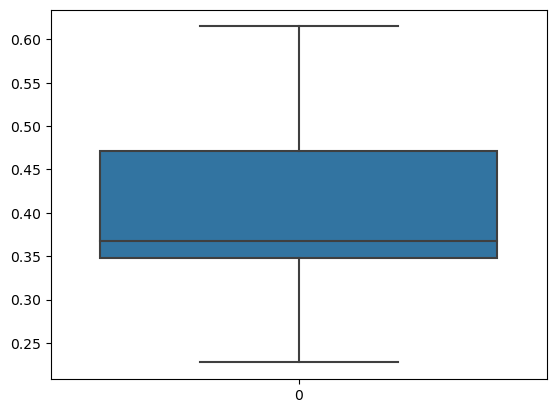

In [30]:
sns.boxplot(data=tuoi_4G['%4G'])

Because we didn't see any outliers, we can exclude this feature from the model

In [31]:
# EDA
# Is Dcom
# dcom_no4G = long_data[long_data['thuc_4g_']==0].groupby('IS_DCOM_')[['user_id']].count().reset_index()
# dcom_no4G.rename(columns = {'user_id':'no_4G'}, inplace = True)
# dcom_4G = long_data[long_data['thuc_4g_']==1].groupby('IS_DCOM_')[['user_id']].count().reset_index()
# dcom_4G.rename(columns = {'user_id':'4G'}, inplace = True)

# dcom_4G = dcom_4G.merge(dcom_no4G, on ='IS_DCOM_', how = 'outer')
# dcom_4G['%4G'] = dcom_4G['4G']/(dcom_4G['4G']+dcom_4G['no_4G'])
# dcom_4G['%no4G'] = dcom_4G['no_4G']/(dcom_4G['4G']+dcom_4G['no_4G'])
dcom_4G=cal_pct(long_data,'IS_DCOM_')

In [32]:
dcom_4G['%4G'].describe()

count    3.000000
mean     0.275618
std      0.227386
min      0.027523
25%      0.176375
50%      0.325228
75%      0.399666
max      0.474104
Name: %4G, dtype: float64

<AxesSubplot:>

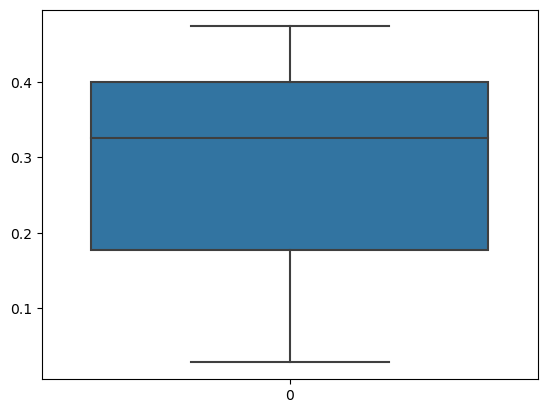

In [33]:
sns.boxplot(data=dcom_4G['%4G'])

From the box plot above, there is no outliers which can affect directly to model so we can exclude this

In [34]:
thoai_4G=cal_pct(long_data,'NOD_PSLL_THOAI_')
thoai_4G

,NOD_PSLL_THOAI_,no_4G,4G,%4G,%no4G
301,30.1,108,343,0.760532,0.239468
300,30.0,112,328,0.745455,0.254545
297,29.7,104,278,0.727749,0.272251
298,29.8,113,284,0.715365,0.284635
302,30.2,155,384,0.712430,0.287570
...,...,...,...,...,...
2,0.2,1471,172,0.104687,0.895313
3,0.3,1267,141,0.100142,0.899858
4,0.4,1262,126,0.090778,0.909222
1,0.1,1906,182,0.087165,0.912835


In [35]:
thoai_4G['%4G'].describe()

count    304.000000
mean       0.551404
std        0.139425
min        0.069311
25%        0.546863
50%        0.594294
75%        0.620325
max        0.760532
Name: %4G, dtype: float64

<AxesSubplot:>

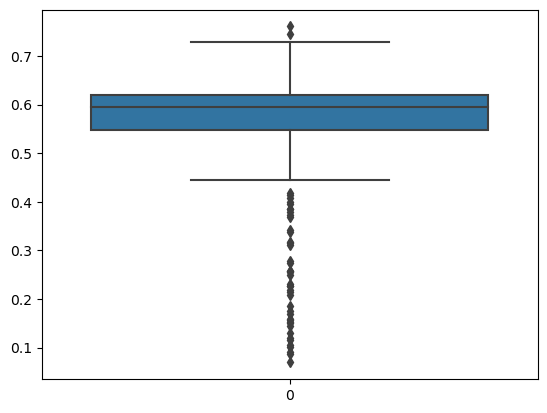

In [36]:
sns.boxplot(data=thoai_4G['%4G'])

With this attribute, we can see there are many outliers in here, we can include this to the model

After running all EDA, we will insert all suspicious attributes into the model to run prediction model

In [37]:
print(long_data['HA_TANG_'].unique())
print(long_data['IS_SIM_4G_'].unique())

['4G' '3G' '2G' 'G' '-1G']
[1. 0.]


In [38]:
#The color between these variables is a little bit dark then we need to check the multicollinearity
import statsmodels.stats.outliers_influence as infl

# Compute the VIFs
vifs = infl.variance_inflation_factor(long_data[['NOD_PSLL_DATA_','SO_NGAY_SU_DUNG_']],exog_idx=[1])

# # Print the VIFs
print(vifs)

# If the VIF for a variable is greater than 10, then the variable is considered to have high multicollinearity. 
#In this case, you may want to consider removing the variable from the model.
# After running the VIF, the final result is 8.4 then there is no multicollinearity


2.545479505768718


*Encoding & Normalizing*

In [39]:
# After running EDA, we can select some attributes as follows

df=long_data[['NOD_PSLL_DATA_',
       'NOD_PSLL_THOAI_','SO_NGAY_SU_DUNG_','THIET_BI_', 'thuc_4g_']]
df

,NOD_PSLL_DATA_,NOD_PSLL_THOAI_,SO_NGAY_SU_DUNG_,THIET_BI_,thuc_4g_
0,12.8,14.2,27.6,4G,0.0
1,0.0,20.2,20.4,4G,0.0
2,15.6,13.8,30.3,4G,1.0
3,9.0,1.8,12.7,4G,0.0
4,0.8,3.7,17.4,2G,0.0
...,...,...,...,...,...
182962,30.2,2.4,30.3,4G,1.0
182963,8.8,3.7,29.9,4G,0.0
182964,3.6,2.3,15.1,2G,0.0
182965,30.2,20.1,30.3,4G,1.0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182967 entries, 0 to 182966
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   NOD_PSLL_DATA_    182967 non-null  float64
 1   NOD_PSLL_THOAI_   182967 non-null  float64
 2   SO_NGAY_SU_DUNG_  182967 non-null  float64
 3   THIET_BI_         182967 non-null  object 
 4   thuc_4g_          182967 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.0+ MB


In [41]:
#One_hot encoding is required to use in DF not array. If we run not in order, it will have an error
def onehot_encoded(data, list_columns):
    one_hot_data = pd.get_dummies(data, columns=list_columns, drop_first=True)
    return one_hot_data

categorical_col = [
#     'TUOI_KHACH_HANG_cut_level_220601',
#                    'HA_TANG_',
#                    'IS_DCOM_',
                   'THIET_BI_']

df = onehot_encoded(df, categorical_col)

# #Create the Test and Train dataset
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#Split X (features) and y (target) in the Database
#.values -> bị chuyển về array 
X = df.drop('thuc_4g_',axis=1)
y = df['thuc_4g_']
print(type(X),type(y))

print(X.shape)
print(y.shape)

# #Call train_test-split and passing our features and targets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=21, stratify=y)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(182967, 7)
(182967,)


In [42]:
X

,NOD_PSLL_DATA_,NOD_PSLL_THOAI_,SO_NGAY_SU_DUNG_,THIET_BI__3G,THIET_BI__4G,THIET_BI__5G,THIET_BI__Unknown
0,12.8,14.2,27.6,0,1,0,0
1,0.0,20.2,20.4,0,1,0,0
2,15.6,13.8,30.3,0,1,0,0
3,9.0,1.8,12.7,0,1,0,0
4,0.8,3.7,17.4,0,0,0,0
...,...,...,...,...,...,...,...
182962,30.2,2.4,30.3,0,1,0,0
182963,8.8,3.7,29.9,0,1,0,0
182964,3.6,2.3,15.1,0,0,0,0
182965,30.2,20.1,30.3,0,1,0,0


In [43]:
y

0         0.0
1         0.0
2         1.0
3         0.0
4         0.0
         ... 
182962    1.0
182963    0.0
182964    0.0
182965    1.0
182966    1.0
Name: thuc_4g_, Length: 182967, dtype: float64

In [44]:
X_train

,NOD_PSLL_DATA_,NOD_PSLL_THOAI_,SO_NGAY_SU_DUNG_,THIET_BI__3G,THIET_BI__4G,THIET_BI__5G,THIET_BI__Unknown
32962,27.0,15.0,30.3,0,1,0,0
181675,1.3,0.0,3.0,0,0,0,1
155592,30.1,26.0,30.3,0,1,0,0
76697,0.0,1.1,3.2,0,0,0,0
30037,1.3,11.2,30.3,0,1,0,0
...,...,...,...,...,...,...,...
150800,1.7,7.4,28.9,0,1,0,0
51796,0.0,11.5,11.5,0,0,0,0
3576,15.4,13.3,29.3,0,1,0,0
147033,2.1,3.1,11.2,0,1,0,0


In [45]:
# Scaling data
from sklearn.preprocessing import MinMaxScaler
X_train_scaled = MinMaxScaler().fit_transform(X_train)
X_test_scaled = MinMaxScaler().fit_transform(X_test)

Running 4 models:KNN, LogisticRegression, DecisionTree, RandomForest

#comparing the F1 score between train set and test set.
#train low, test low -> underfitting -> easy to learn, when we input many variables without clearly selection
Some possible reasons:
- Features are not enough
- Data bias
- Model is so simple (KNN is easy to be underfitting) -->
#train high, test low -> overfitting-> too strict when learning

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [47]:
#Logistic Regression
loreg = LogisticRegression()
loreg.fit(X_train_scaled,y_train)
y_pred_loreg = loreg.predict(X_test_scaled)

#F1_score
from sklearn.metrics import balanced_accuracy_score
f1_loreg = balanced_accuracy_score(y_test, y_pred_loreg)
f1_loreg

#running to check the overfitting/ or underfitting

y_pred_loreg_train = loreg.predict(X_train_scaled)
f1_loreg_train = balanced_accuracy_score(y_train, y_pred_loreg_train)

print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_pred_loreg_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_pred_loreg)}')


Balance accuracy of train set: 0.8872159453457524
Balance accuracy of test set: 0.886282693250969


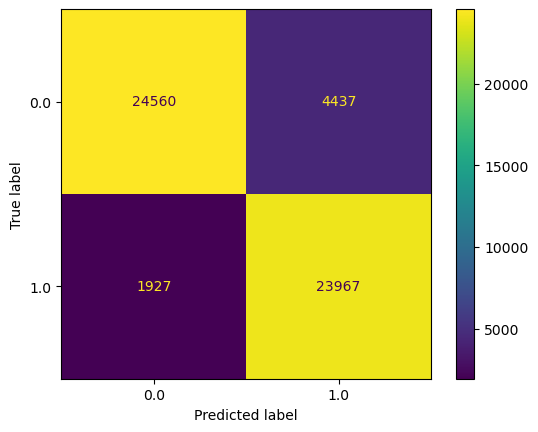

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_loreg, labels=loreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=loreg.classes_)
disp.plot()

In [49]:
#We use ROC curve to check whether other probability threshold can make higher balanced accuracy

from sklearn import metrics

#ROC CURVE
# Determine the false positive and true positive rates
y_pred_proba = loreg.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred_proba)

roc_df = pd.DataFrame(zip(fpr, tpr, threshold), columns = ['FPR', 'TPR', 'threshold'])
roc_df



,FPR,TPR,threshold
0,0.000000,0.000000,1.994251
1,0.000000,0.000154,0.994251
2,0.000000,0.000270,0.994190
3,0.000000,0.000348,0.994153
4,0.000000,0.000502,0.994129
...,...,...,...
14477,0.997655,1.000000,0.000010
14478,0.997965,1.000000,0.000010
14479,0.998379,1.000000,0.000010
14480,0.998862,1.000000,0.000010


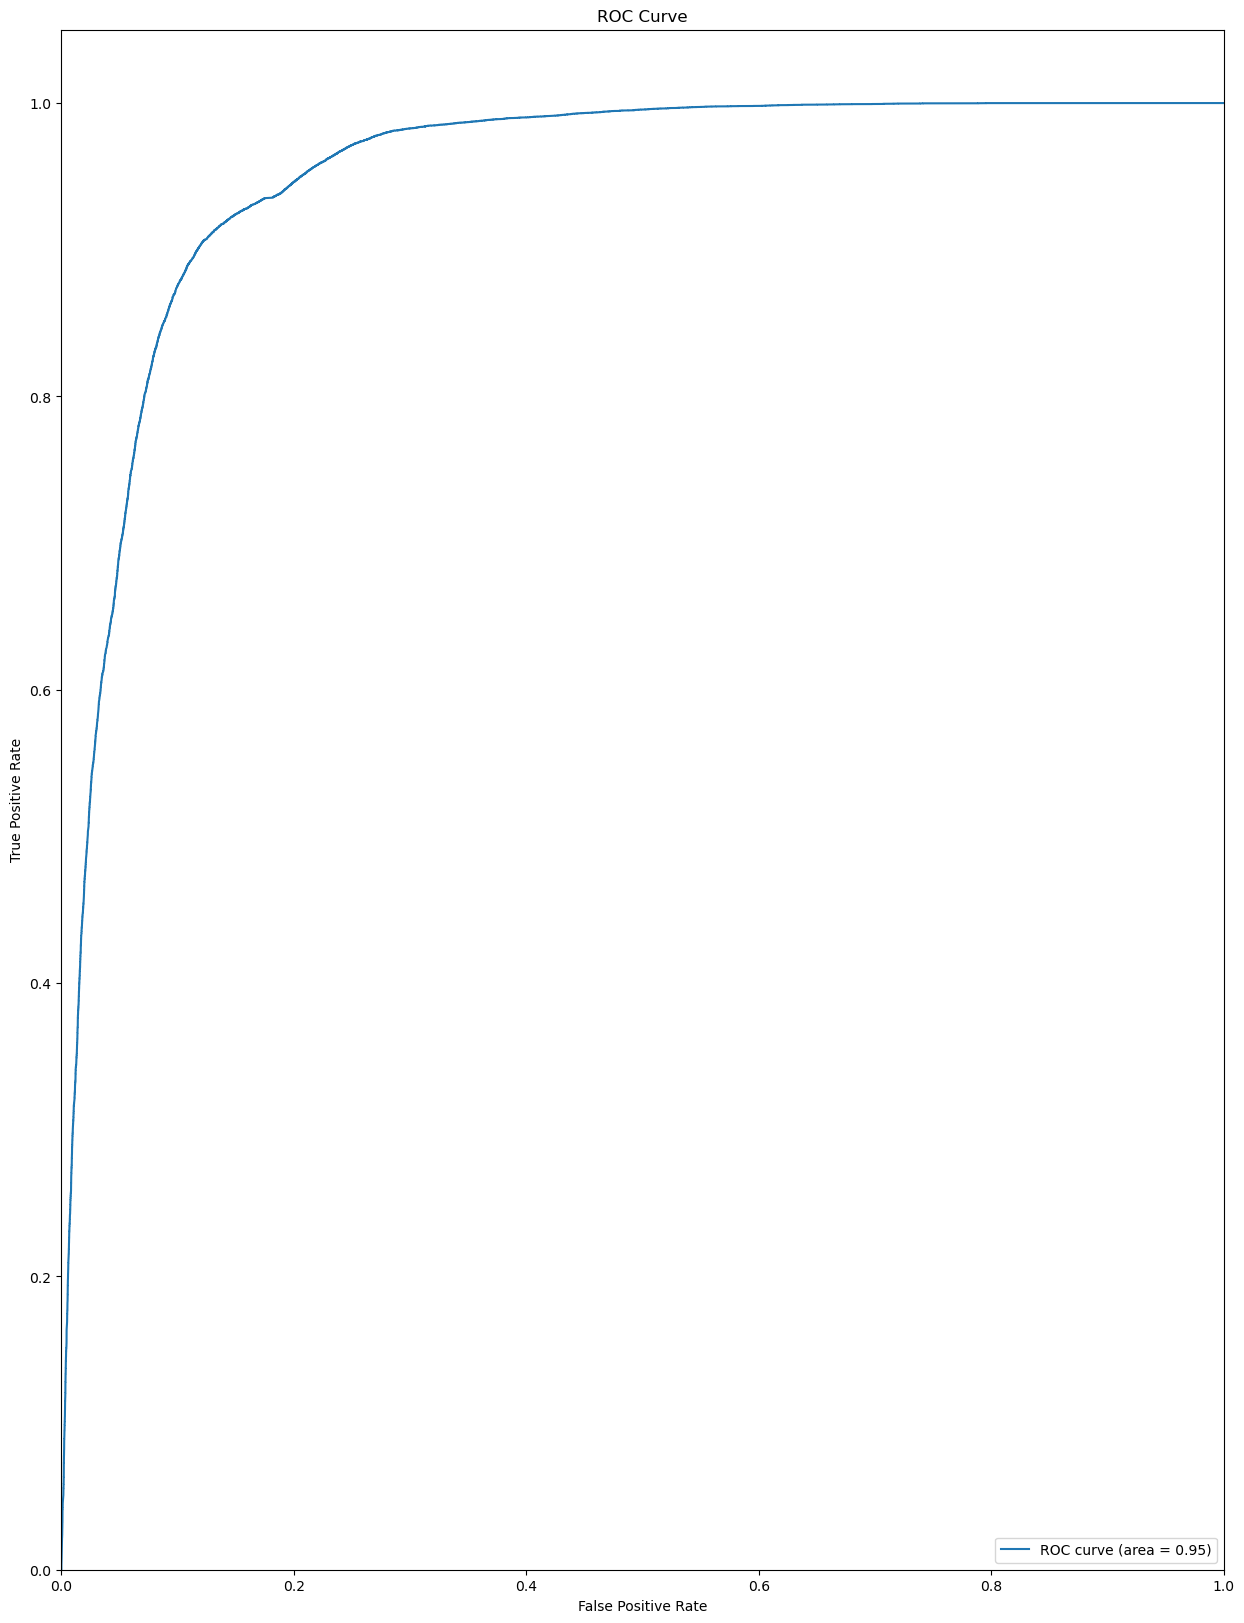

In [50]:
import sklearn.metrics

roc_auc = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)


# Plot of a ROC curve for a specific class
plt.figure(figsize = (15,20))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %roc_auc) 
#plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [51]:
# KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled,y_train)
y_pred_KNN = KNN.predict(X_test_scaled)
f1_KNN = balanced_accuracy_score(y_test, y_pred_KNN)
f1_KNN

#running to check the overfitting/ or underfitting

y_pred_KNN_train = KNN.predict(X_train_scaled)
f1_KNN_train = balanced_accuracy_score(y_train, y_pred_KNN_train)
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_pred_KNN_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_pred_KNN)}')


Balance accuracy of train set: 0.9293637416933122
Balance accuracy of test set: 0.9051963055739309


In [52]:
# Decision Tree
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled,y_train)
y_pred_tree = tree.predict(X_test_scaled)
f1_tree = balanced_accuracy_score(y_test, y_pred_tree)
f1_tree

y_pred_tree_train = tree.predict(X_train_scaled)
f1_tree_train = balanced_accuracy_score(y_train, y_pred_tree_train)
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_pred_tree_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_pred_tree)}')

Balance accuracy of train set: 0.9882611663246723
Balance accuracy of test set: 0.8764079185165066


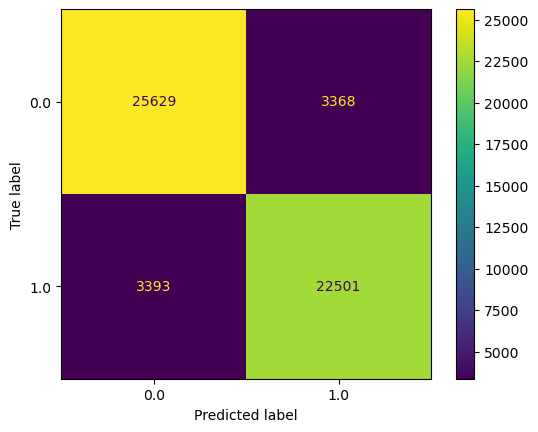

In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
disp.plot()

In [54]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X_test.columns, tree.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

In [55]:
importances

,index,Gini-importance
0,THIET_BI__3G,0.000513
1,THIET_BI__Unknown,0.000592
2,THIET_BI__5G,0.037844
3,THIET_BI__4G,0.108290
4,NOD_PSLL_DATA_,0.121381
5,NOD_PSLL_THOAI_,0.201734
6,SO_NGAY_SU_DUNG_,0.529646


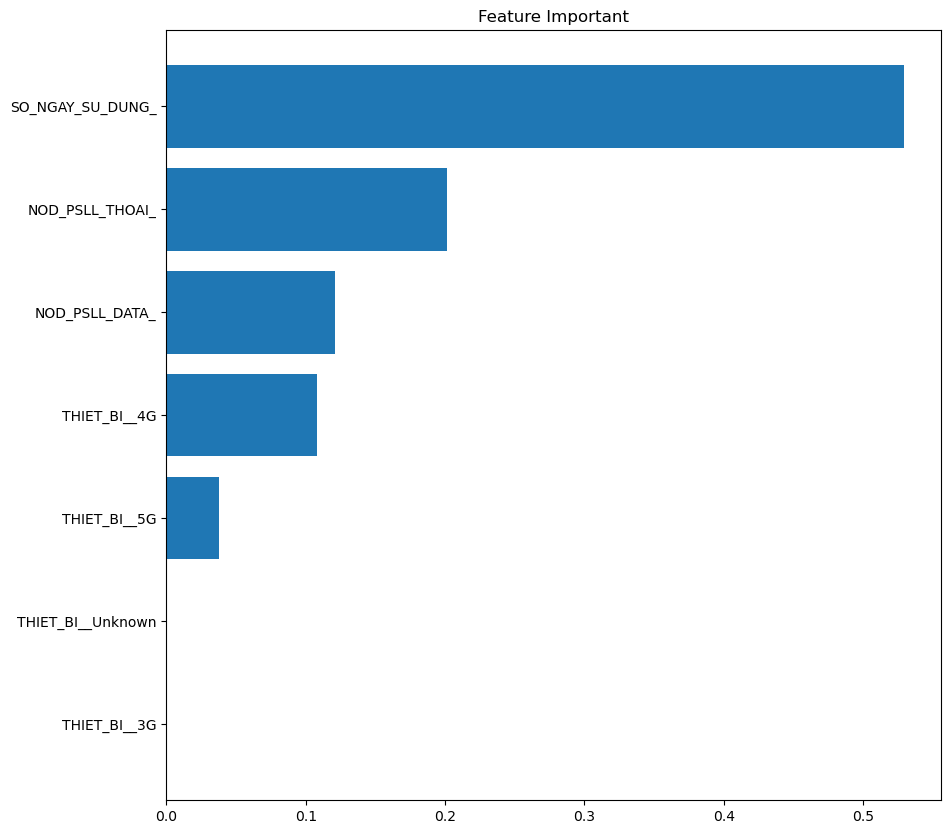

In [56]:
# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

# Add labels and title
# plt.xlabel('Category')
# plt.ylabel('Value')
plt.title('Feature Important')

# Show plot
plt.show()

So Ngay Su Dung is the high important feature that model considered when calculating

In [57]:
# Random Forest
forest = RandomForestClassifier()
forest.fit(X_train_scaled,y_train)
y_pred_forest = forest.predict(X_test_scaled)
f1_forest = balanced_accuracy_score(y_test, y_pred_forest)

y_pred_forest_train = forest.predict(X_train_scaled)
f1_forest_train = balanced_accuracy_score(y_train, y_pred_forest_train)
print(f'Balance accuracy of train set: {balanced_accuracy_score(y_train, y_pred_forest_train)}')
print(f'Balance accuracy of test set: {balanced_accuracy_score(y_test, y_pred_forest)}')

Balance accuracy of train set: 0.9885870251470599
Balance accuracy of test set: 0.9035225787107644


Conclusion:
The balance accuracy:

Logistic Regression: 89%
KNN: 90%
Decision Tree: 99%
Random Forest: 99%

Compared between Decision Tree and Random Forest, the F1 score of test set in Random Forest is a little bit higher 
--> We will choose Random Forest